In [71]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
global a, b

In [72]:
def f(x):
    return np.power((x-7), 2)

a = -2
b = 20

# Dichotomous search

In [73]:
def dichotomy(a, b, eps):
    a_prev, b_prev = a, b
    delta = eps / 2
    k, f_count, k_list, length_list = 0, 0, [], []
    df = pd.DataFrame(columns=('x1', 'x2', 'f(x1)', 'f(x2)', 'ai', 'bi', 'len', 'len_prev/len'))
    while abs(b-a) > eps:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        a_prev = a
        b_prev = b
        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
        k += 1
        f_count += 2
        length_list.append(abs(b-a)), k_list.append(k)
        df.loc[len(df)] = np.array([x1, x2, f(x1), f(x2), a, b, b-a, (b_prev-a_prev)/(b-a)])
    df.index += 1
    print('Min:', (a+b)/2, '\nNumber of iterations:', k, '\nFunction calculations:', f_count)
    return df
    #plt.plot(k_list, length_list)

# Golden-section search

In [74]:
def golden_section(xl, xu, extremum_type, eps):
    xl_prev, xu_prev = xl, xu 
    error, f_count  = 1, 0
    df = pd.DataFrame(columns=('x1', 'x2', 'f(x1)', 'f(x2)', 'ai', 'bi', 'len', 'len_prev/len'))
    while error >= eps:
        x1, x2 = update(xl, xu)
        flag = is_right(x1, x2)
        #clear_output(wait=True)
        #plot_func(xl, xu, x1, x2) 
        #plt.show()
        #time.sleep(0.1)
        xl_prev, xu_prev = xl, xu 
        xl, xu, x_opt = find_extremum(xl, xu, x1, x2, extremum_type, flag)    
        r = (np.sqrt(5)-1)/2 
        error = ((1-r)*(abs((xu-xl)/x_opt)))*100
        f_count += 1
        df.loc[len(df)] = np.array([x1, x2, f(x1), f(x2), xl, xu, xu-xl, (xu_prev-xl_prev)/(xu-xl)])
    df.index += 1
    print('\nExtremum:', np.mean([x1, x2]), '\nError:', error, '\nFunction calculations:', f_count)
    return df
    #plot_err(error_list, k_list)

def find_extremum(xl, xu, x1, x2, extremum_type, flag):
    if f(x2) > f(x1) and flag == 1:
        if extremum_type == 'max':
            xu = x1 
            x1, x2 = update(xl, xu)
            x_opt = x2
        elif extremum_type == 'min': 
            xl = x2
            x1, x2 = update(xl, xu)
            x_opt = x1      
    else:
        if extremum_type == 'max':
            xl = x2
            x1, x2 = update(xl, xu)
            x_opt = x1
        elif extremum_type == 'min': 
            xu = x1
            x1, x2 = update(xl, xu)
            x_opt = x2
    return xl, xu, x_opt
    
def update(xl, xu):
    d = ((np.sqrt(5)-1)/2)*(xu-xl)
    return xl + d, xu - d 

def is_right(x1, x2):
    if x1 > x2: 
        return 1
    
def plot_func(xl, xu, x1, x2):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(np.linspace(a, b, 50), f(np.linspace(a, b, 50))) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(list(range(a, b+1, 1)))
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False)
    ax.plot([-2, 20], [0, 0], 'grey')
    ax.plot([xl, xl], [0, f(max([a, b]))], linestyle='dashed', color='grey') # xl line
    ax.plot([xu, xu], [0, f(max([a, b]))], linestyle='dashed', color='grey') # xu line
    ax.plot([x1, x1], [0, f(max([a, b]))], 'k') # x1 line
    ax.plot([x2, x2], [0, f(max([a, b]))], 'k') # x2 line
    ax.plot(x1, f(x1), 'bo', label='x1', zorder=3) # x1 point
    ax.plot([x1, x1], [0, f(x1)], 'k')
    ax.plot(x2, f(x2), 'bo', label='x2', zorder=3) # x2 point
    ax.plot([x2, x2], [0, f(x2)], 'k')
    
def plot_err(error_list, k_list):
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(k_list, error_list, 'r')
    ax.scatter(k_list, error_list, zorder=2)
    ax.set_xlabel('iteration')
    ax.set_ylabel('error')

# Interval search

In [75]:
def select_step(x, delta):
    if f(x) > f(x + delta):
        return delta
    return -delta

def interval_search(x_0, delta):
    df = pd.DataFrame(columns=('xi', 'f(xi)'))
    step = select_step(x_0, delta)
    x_k = x_0 + step
    step = step * 2
    while f(x_k) > f(x_k + step):
        x_k = x_k + step
        step = step * 2
        df.loc[len(df)] = np.array([x_k, f(x_k)])
    if step < 0.0: 
        print('Interval: (', x_k + step/2, x_k - step/2, ')')
    else: 
        print('Interval: (', x_k - step/2, x_k + step/2, ')')
    df.index += 1
    return df

# Fibonacci search

In [76]:
def fibonacci_number(n):
    return np.power((1 + np.sqrt(5))/2, n) / np.sqrt(5)

def find_min(segment_length, eps):
    n = 0
    while segment_length / eps > fibonacci_number(n):
        n += 1
    return n

def fibonacci(a_0, b_0, eps):
    df = pd.DataFrame(columns=('x1', 'x2', 'f(x1)', 'f(x2)', 'ai', 'bi', 'len', 'len_prev/len'))
    n = find_min(b_0 - a_0, eps)
    f_count, k = 0, 0
    a_k = a_0
    b_k = b_0
    a_kprev, b_kprev = a_k, b_k
    x_k = a_0 + (fibonacci_number(n - 2) / fibonacci_number(n)) * (b_k - a_k)
    y_k = a_0 + (fibonacci_number(n - 1) / fibonacci_number(n)) * (b_k - a_k)
    while (k != n - 3):
        a_kprev, b_kprev = a_k, b_k
        if f(x_k) <= f(y_k):
            b_k = y_k
            y_k = x_k
            x_k = a_k + (fibonacci_number(n - k - 3) / fibonacci_number(n - k - 1)) * (b_k - a_k)
        else:
            a_k = x_k
            x_k = y_k
            y_k = a_k + (fibonacci_number(n - k - 2) / fibonacci_number(n - k - 1)) * (b_k - a_k)
        k += 1
        f_count += 1
        df.loc[len(df)] = np.array([x_k, y_k, f(x_k), f(y_k), a_k, b_k, b_k-a_k, (b_kprev-a_kprev)/(b_k-a_k)])
    y_k = x_k + eps
    if f(x_k) <= f(y_k):
        b_k = y_k
    else:
        a_k = x_k
    f_count += 1
    print('Min:', (a_k + b_k) / 2, '\nFunction calculations:', f_count)
    df.index += 1
    return df

# Testing

In [77]:
dichotomy(a, b, 1e-7)

Min: 7.000000006408101 
Number of iterations: 29 
Function calculations: 58


,x1,x2,f(x1),f(x2),ai,bi,len,len_prev/len
1,9.000000,9.000000,4.000000e+00,4.000000e+00,-2.000000,9.000000,1.100000e+01,2.000000
2,3.500000,3.500000,1.225000e+01,1.225000e+01,3.500000,9.000000,5.500000e+00,2.000000
3,6.250000,6.250000,5.625000e-01,5.625000e-01,6.250000,9.000000,2.750000e+00,2.000000
4,7.625000,7.625000,3.906250e-01,3.906250e-01,6.250000,7.625000,1.375000e+00,2.000000
5,6.937500,6.937500,3.906253e-03,3.906246e-03,6.937500,7.625000,6.875000e-01,2.000000
6,7.281250,7.281250,7.910155e-02,7.910158e-02,6.937500,7.281250,3.437500e-01,2.000000
7,7.109375,7.109375,1.196289e-02,1.196290e-02,6.937500,7.109375,1.718750e-01,2.000000
8,7.023437,7.023438,5.493154e-04,5.493178e-04,6.937500,7.023438,8.593755e-02,1.999999
9,6.980469,6.980469,3.814705e-04,3.814686e-04,6.980469,7.023438,4.296880e-02,1.999999
10,7.001953,7.001953,3.814617e-06,3.814813e-06,6.980469,7.001953,2.148442e-02,1.999998


In [78]:
#golden_section(a, b, 'max', 1e-7)

In [79]:
golden_section(a, b, 'min', 1e-7)


Extremum: 7.0000000017267325 
Error: 7.654083740496931e-08 
Function calculations: 44


,x1,x2,f(x1),f(x2),ai,bi,len,len_prev/len
1,11.596748,6.403252,2.113009e+01,3.561079e-01,-2.000000,11.596748,1.359675e+01,1.618034
2,6.403252,3.193496,3.561079e-01,1.448948e+01,3.193496,11.596748,8.403252e+00,1.618034
3,8.386991,6.403252,1.923744e+00,3.561079e-01,3.193496,8.386991,5.193496e+00,1.618034
4,6.403252,5.177234,3.561079e-01,3.322475e+00,5.177234,8.386991,3.209757e+00,1.618034
5,7.160973,6.403252,2.591232e-02,3.561079e-01,6.403252,8.386991,1.983739e+00,1.618034
6,7.629270,7.160973,3.959810e-01,2.591232e-02,6.403252,7.629270,1.226018e+00,1.618034
7,7.160973,6.871549,2.591232e-02,1.649955e-02,6.403252,7.160973,7.577208e-01,1.618034
8,6.871549,6.692676,1.649955e-02,9.444814e-02,6.692676,7.160973,4.682972e-01,1.618034
9,6.982099,6.871549,3.204309e-04,1.649955e-02,6.871549,7.160973,2.894236e-01,1.618034
10,7.050423,6.982099,2.542485e-03,3.204309e-04,6.871549,7.050423,1.788736e-01,1.618034


In [80]:
fibonacci(a, b, 1e-7)

Min: 7.000000010668826 
Function calculations: 40


,x1,x2,f(x1),f(x2),ai,bi,len,len_prev/len
1,3.193496,6.403252,1.448948e+01,3.561079e-01,-2.000000,11.596748,1.359675e+01,1.618034
2,6.403252,8.386991,3.561079e-01,1.923744e+00,3.193496,11.596748,8.403252e+00,1.618034
3,5.177234,6.403252,3.322475e+00,3.561079e-01,3.193496,8.386991,5.193496e+00,1.618034
4,6.403252,7.160973,3.561079e-01,2.591232e-02,5.177234,8.386991,3.209757e+00,1.618034
5,7.160973,7.629270,2.591232e-02,3.959810e-01,6.403252,8.386991,1.983739e+00,1.618034
6,6.871549,7.160973,1.649955e-02,2.591232e-02,6.403252,7.629270,1.226018e+00,1.618034
7,6.692676,6.871549,9.444814e-02,1.649955e-02,6.403252,7.160973,7.577208e-01,1.618034
8,6.871549,6.982099,1.649955e-02,3.204309e-04,6.692676,7.160973,4.682972e-01,1.618034
9,6.982099,7.050423,3.204309e-04,2.542485e-03,6.871549,7.160973,2.894236e-01,1.618034
10,6.939873,6.982099,3.615246e-03,3.204309e-04,6.871549,7.050423,1.788736e-01,1.618034


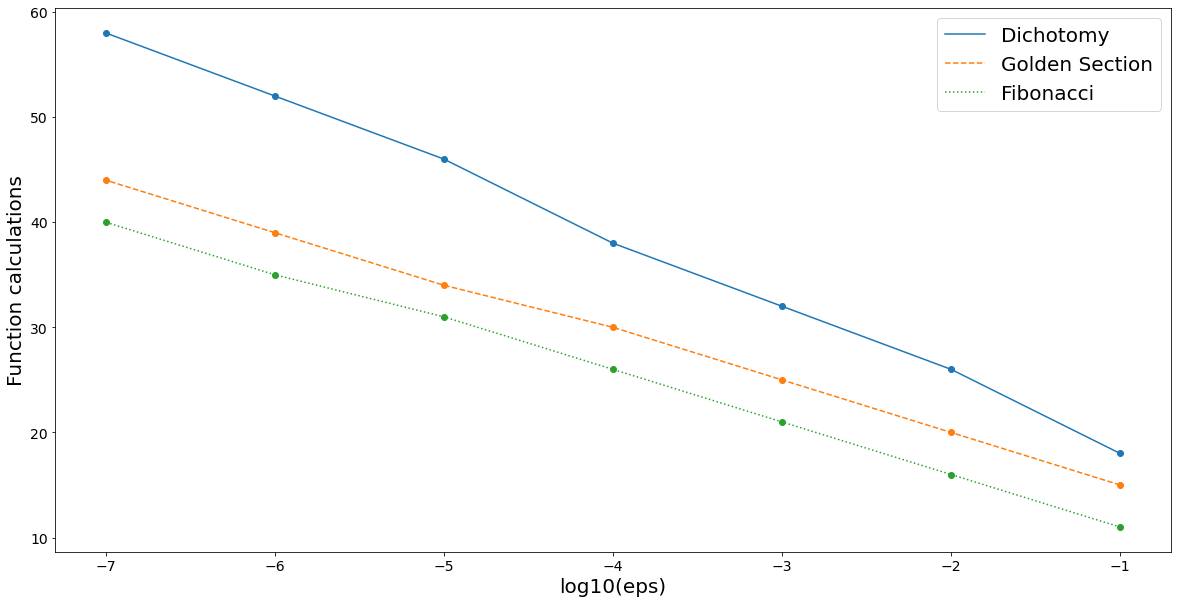

In [81]:
count_dichotomy = [18, 26, 32, 38, 46, 52, 58]
count_golden_section = [15, 20, 25, 30, 34, 39, 44]
count_fibonacci = [11, 16, 21, 26, 31, 35, 40]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_dichotomy, label='Dichotomy')
ax.plot(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_golden_section, label='Golden Section', linestyle='dashed')
ax.plot(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_fibonacci, label='Fibonacci', linestyle='dotted')
ax.scatter(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_dichotomy)
ax.scatter(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_golden_section)
ax.scatter(np.log10([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]), count_fibonacci)
ax.legend(fontsize=20)
ax.set_ylabel('Function calculations', fontsize=20)
ax.set_xlabel('log10(eps)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [82]:
interval_search(2, 0.001)

Interval: ( 4.047000000000001 8.143 )


,xi,f(xi)
1,2.003,24.970009
2,2.007,24.930049
3,2.015,24.850225
4,2.031,24.690961
5,2.063,24.373969
6,2.127,23.746129
7,2.255,22.515025
8,2.511,20.151121
9,3.023,15.816529
10,4.047,8.720209
